# 4 - Matplotlib

**Summary**
> * Your first plots
>> * Plotting a function
>> * Histograms
>> * Dispersion plots
>> * Heatmaps



> * Plot customization
>> * Labels
>> * Lines and markers
>> * Legend
> * Multiple plots

> * Saving plots

> * Example: Plotting the different forms of a probability distribution

> * Example: Phase portraits


Matplotlib tutorials: https://matplotlib.org/3.1.1/tutorials/index.html

## Your first plots

`matplotlib.pyplot` is a collection of command style functions that make matplotlib work like MATLAB.

To import the module see below. As for Numpy there is a standard way to call the reference of matplotlib.pyplot in your program, which is `plt`.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

Below we show the four main kinds of plot that are typically used: `plot`, `hist`, `scatter`, `imshow`.

### Plotting a function

Let's imagine that we have a physical process that is generating, for example, a damped oscillation. The functional form of it is the following:

In [ ]:
def f(x):
  # Note that numpy knows a good approximation of pi!
  return np.exp(-2*x) * np.cos(6*np.pi*x)

We want to plot this in the interval $[0,1]$.. We can use numpy for generating the x values within this interval:

In [ ]:
n_points = 200

data_x = np.linspace(0, 1, n_points)

true_y = f(data_x)  # Generating also the sequence of ys from the function

# Note that we are passing the full numpy array of values (data_x) to the function.
# Within the function all the operations are applied element-wise to
# the array. This returns a second numpy array whose elements corresponds
# to the application of f() at each element of data_x

The function `plot(x, y)` interpolates the sequence of points with a line in the x-y plane. If we have enough `n_points` the result is a smooth representation of the function that we want to draw.


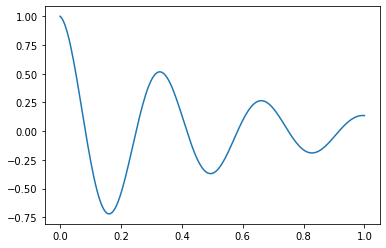

In [ ]:
plt.plot(data_x, true_y)

### Histogram

Let us imagine that the physical process that we want to study is affected by experimental noise.

Here we have gaussian noise with zero mean.

In [ ]:
average, sigma = 0, 0.15
noise = np.random.normal(average, sigma, n_points)

Let's check the shape of this noise. We can easily compute the histogram of the values inside the array. It should look like the usual bell-shaped curve:

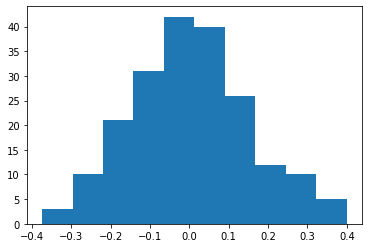

In [ ]:
counts, bins, h = plt.hist(noise)

Note that the histogram returns the list of counts for each bin, `counts`, and the edges of the bins, `bins`.
For example:



In [ ]:
print("There are " + str(counts[4]) + " counts in the interval [" + str(bins[4]) + ", " + str(bins[5]) + "]")

There are 42.0 counts in the interval [-0.06486459909751868, 0.012477517744970468]


### Dispersion plot

The data that we observe from our measurements is therefore the true function `f(x)` plus the `noise`.

In [ ]:
data_y = true_y + noise
# Again the fact that the sum between numpy arrays works element-wise
# allows us to get result without "unpacking" the array.

The result of our measurement is therefore the following dispersion graph, that can be plotte with the method `scatter()`.

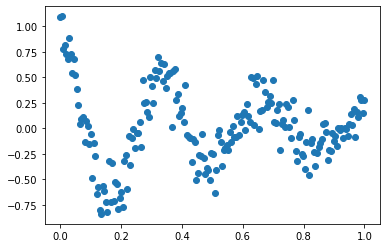

In [ ]:
plt.scatter(data_x, data_y)

### Heatmap plot

Sometimes we want to plot 2D-functions. One way is to plot them as a heatmap, where the color of a given point is proportional to the value of the function there.
Let us plot the function $f(x,y) = \sin(2\pi x)/(1+y^2)$ as a heatmap.
A simple way is to create a grid of $(x_i,y_i)$ points, and compute for each of them $z_{ij} = f(x_i, y_i)$.
We can plot the matrix $Z$ with the `heatmap` function.

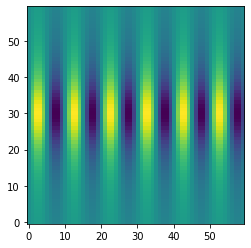

In [ ]:
x = np.arange(-3.0,3.0,0.1)   # creates an array of point from -3 to 3 with distance 0.1
y = np.arange(-3.0,3.0,0.1)   # creates an array of point from -3 to 3 with distance 0.1
X,Y = np.meshgrid(x, y)       # grid of point
Z = np.sin(X*2*np.pi)/ (1+Y**2) # evaluation of (the function on the grid

plt.imshow(Z, origin='lower') # drawing the function.

Regarding the data created above, we can produce a 2d-histogram.



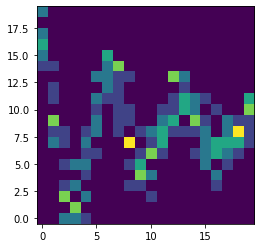

In [ ]:
counts, _, _ = np.histogram2d(data_x, data_y, bins=20)
plt.imshow(counts.transpose(), origin='lower')



## Plot customization

### Labels and range

You are a physiscist! You know that you have to write the quantities your are plotting to make other people understand..

Below it is shown how to put labels on the axis, a title, and how to change th range of x and y to show in the canvas.

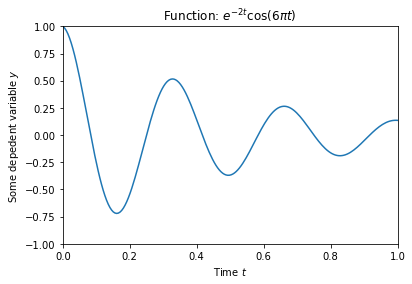

In [ ]:
plt.title('Function: $e^{-2t} \cos(6 \pi t)$')  #  Title
plt.xlabel('Time $t$')  # x label
plt.ylabel('Some depedent variable $y$')  # y label

plt.xlim([0,1])  # Setting the x range
plt.ylim([-1,1])  # Setting the y range

plt.plot(data_x, true_y)

Note that you can use Latex synthax within the dollar symbols!

### Lines and markers

The plotting functions, e.g. plot or scatter, accept a huge number of properties that allows to customize your graph.

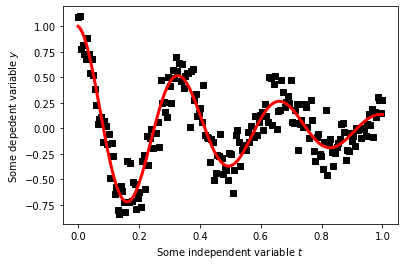

In [ ]:
plt.xlabel('Some independent variable $t$')
plt.ylabel('Some depedent variable $y$')

# Two plotting functions in the same pyplot environment are plotted together in the same canvas
plt.plot(data_x, true_y, linewidth=3, color='red')
plt.scatter(data_x, data_y, marker='s', color='black')

We changed the line witdh (`linewidth` or `ls`), the colors (`color` or `c`), and the marker shape (`marker`). See the official matplotlib documentation to explore other possibilities. For example how to change the line style (`linestyle`) or the marker size (`size`).

### Legend

Multiple elements in the same plot need a legend. It requires a label for each graphic element that you are generating and the method `legend()`.

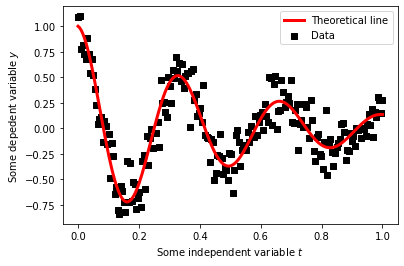

In [ ]:
plt.xlabel('Some independent variable $t$')
plt.ylabel('Some depedent variable $y$')

# Labels inside the graphical objects
plt.plot(data_x, true_y, linewidth=3, color='red', label='Theoretical line')
plt.scatter(data_x, data_y, marker='s', color='black', label='Data')

# Legent keyword
plt.legend()

## Multiple plots

You can draw different plots in the same figure. The easiest way is to:
* declare that you are building a figure with `plt.figure()`.
* Before each sub-plot call the method `plt.subplot(i,j,n)`, where:
> * `i` is the number of plots in rows
> * `j` is the number of plots in columns
> * `n` is the plot number

For example:

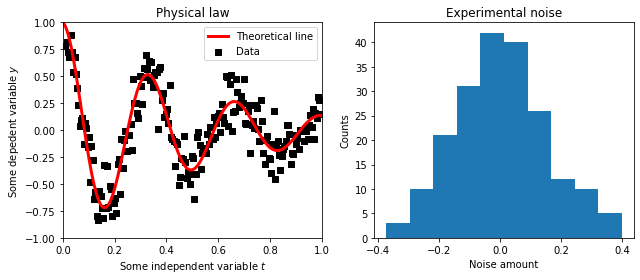

In [ ]:
fig = plt.figure(figsize=(9,4)) # Here you can specify the tot size of the figure

plt.subplot(121)
plt.title('Physical law')
plt.xlabel('Some independent variable $t$')
plt.ylabel('Some depedent variable $y$')
plt.xlim([0,1])  # Setting the x range
plt.ylim([-1,1])  # Setting the y range
plt.plot(data_x, true_y, linewidth=3, color='red', label='Theoretical line')
plt.scatter(data_x, data_y, marker='s', color='black', label='Data')
plt.legend()

plt.subplot(122)
plt.title('Experimental noise')
plt.xlabel('Noise amount')
plt.ylabel('Counts')
counts, bins, h = plt.hist(noise)

plt.tight_layout() # This method allows for a better alignments of all the elements

## Saving plot

Often you will need to save a plot for future use. We can do that as follows.
Recall how you can create a folder (for example `'./figures'`) using the left menu.

In [ ]:
fig_name = "./figures/test.png"
fig.savefig(fig_name, format='png', bbox_inches = "tight", pad_inches = 0.4, dpi = 600)
plt.close()

FileNotFoundError: ignored

If you save them locally only, remember that they will be lost when the colab notebook is disconnected.
Remember to download them if you don't want that!

## Example: Plotting the different forms of a probability distribution


As a plotting example, we will investiage the different forms that probability distributions can take on and how to plot them.

First, say you are interested in obtaining a value from the Probability Density Function (PDF; $P(x)$) of having a random variable of value $x=0.5$? For this example we will use the standard Gaussian where $\mu = 0$ and $\sigma^{2} = 1$.

In [ ]:
from scipy import stats
stats.norm.pdf(0.3, loc=0, scale=1)

0.3989422804014327

We can plot the PDF over a range of $x$ using the quantile function (also known as the percent-point function). To start we will need the integral of the PDF, known as the Cumulative Distribution Function (CDF). This function allows you to calculate the probability of observing a random variable $X$ less than or equal to the value $x$


$$
F(x) = \int_{-\infty}^{x} P(y) dy
$$

From this function we obtain the quantile function

$$
Q(x) = F^{-1}(x)
$$


Using the quantile function we obtain a range of quantiles over a range of random variables and




Text(0, 0.5, 'Probability, $P(X)$')

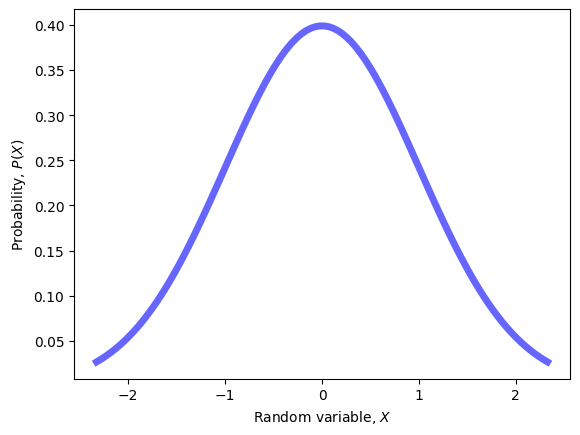

In [ ]:
plt.figure()

x = np.linspace(stats.norm.ppf(0.01), stats.norm.ppf(0.99), 100)
plt.plot(x, stats.norm.pdf(x), 'b-', lw=5, alpha=0.6, label='Gaussian')
plt.xlabel('Random variable, $X$')  # x label
plt.ylabel('Probability, $P(X)$')  # y label

Similarly, we can plot the CDF.

Text(0, 0.5, 'Cumulative probability, $P(X \\leq x)$')

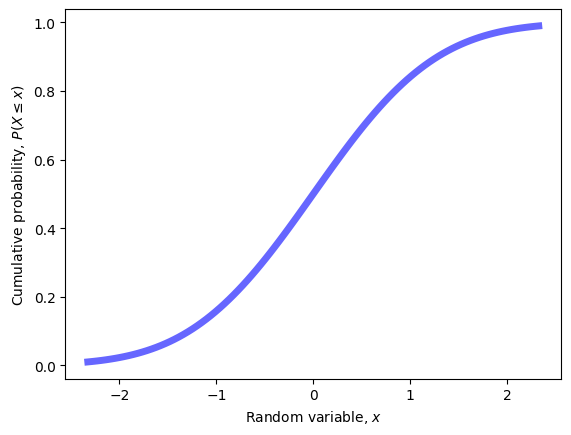

In [ ]:
plt.figure()

x = np.linspace(stats.norm.ppf(0.01), stats.norm.ppf(0.99), 100)
plt.plot(x, stats.norm.cdf(x), 'b-', lw=5, alpha=0.6, label='Gaussian')
plt.xlabel('Random variable, $x$')  # x label
plt.ylabel('Cumulative probability, $P(X \leq x)$')  # y label

Say we want to *fit* a distribution to data, where we want to infer the parameters of a distribution. As an example, we can simulate data and then fit it

Mean = 0.907, Std dev. = 2.946


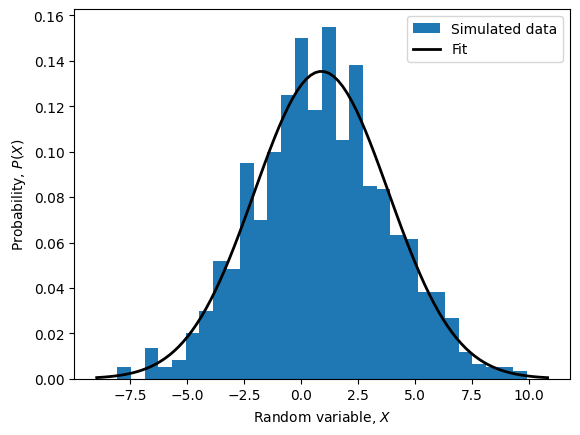

In [ ]:

# simulate data
data = np.random.normal(loc=1.0, scale=3.0, size=1000)
# fit it using scipy
mean, std = stats.norm.fit(data)

print('Mean = %.3f, Std dev. = %.3f' % (mean, std))

plt.figure()
plt.hist(data, bins=30, density=True, label='Simulated data')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = stats.norm.pdf(x, mean, std)
plt.plot(x, y, c='k', label='Fit', lw=2)
plt.xlabel('Random variable, $X$')  # x label
plt.ylabel('Probability, $P(X)$')  # y label
plt.legend()
plt.show()



We see that the fitted mean and standard deviation values are close to the values provided to `SciPy`.

### Example: Phase portraits

When examining how dynamical systems behave with time it is often useful to plot the trajectories of the variables. This geometric representation of the behavior of the system is known as a *phase portrait*. In your courses this year you will be asked to examine the trajectories of deterministic systems, so it useful to introduce the functions used to plot these systems here.

Since you are in QLS, we will plot the phase portrait for a classic nonlinear system of two interacting populations: the Lotka-Volterra equations.

$$
\frac{d x}{d t} = \alpha x - \beta x y
$$

$$
\frac{d y}{d t} = \gamma xy - \delta y
$$

Here $x$ is a population of rabbits and $y$ is the population of foxes that grows by eating rabbits.

The four parameters represent:
- $\alpha$ is growth of preys
- $\beta$ is death by hunting
- $\delta$ is growth of predators due to hunting
- $\gamma$ is intrinsic death rates of predators

You will likely be mathematically examining this model in your ecology course this year, so we are focused here on plotting the phase portrait of the system. We will start by writing a function for the system of equations




In [ ]:
alpha = 1.0 #mortality rate due to predators
beta = 1.0
delta = 1.0
gamma = 1.0
x0 = 3
y0 = 1

def lv_derivative(X, t, alpha, beta, delta, gamma):
    x, y = X
    derivative_x = x * (alpha - beta * y)
    derivative_y = y * (-delta + gamma * x)
    return np.array([derivative_x, derivative_y])

In order to plot the phase portrait we will need to solve the system of equations. Here we we will numerically solve the system using the `odeint()` function from `SciPy`. Do not worry about the details of this function, we will cover them in the next lesson. We will first plot the population sizes over time obtained from numerically integrating the system to illustrate the dynamics.

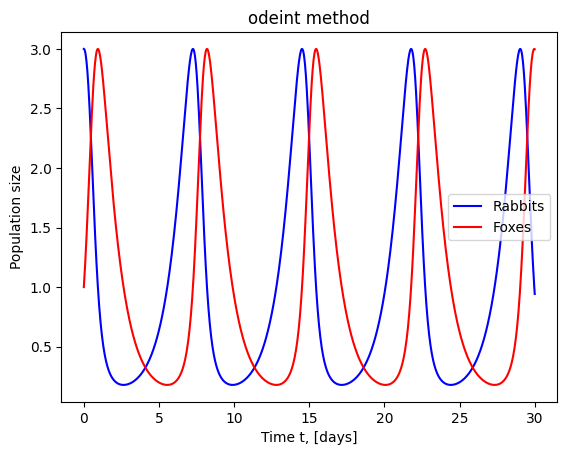

In [ ]:
from scipy import integrate
n_timesteps = 1000
t_max = 30.
t = np.linspace(0.,t_max, n_timesteps)
X0 = [x0, y0]
res = integrate.odeint(lv_derivative, X0, t, args = (alpha, beta, delta, gamma))
x, y = res.T

plt.figure()
plt.title("Numerical integration results")
plt.plot(t, x, c='b', label = 'x, Rabbits')
plt.plot(t, y, c='r', label = "y, Foxes")
plt.xlabel('Time t, [days]')
plt.ylabel('Population size')
plt.legend()

plt.show()

You can see that the populations clearly oscillate over time. However, we had to choose a set of initial conditions. We can use a phase portrait to investigate the oscillatory dynamics for different initial conditions

(0.0, 3.307865232618492)

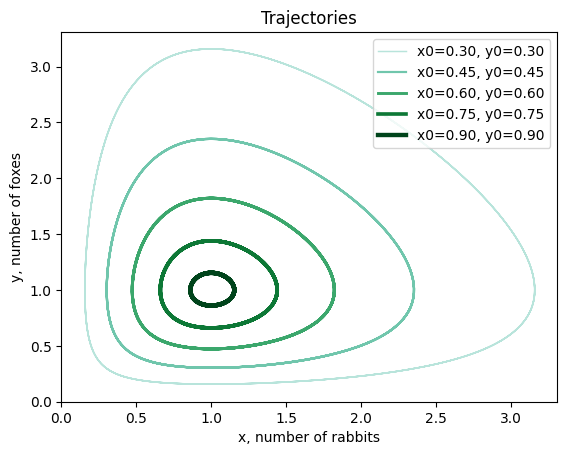

In [ ]:
values  = np.linspace(0.3, 0.9, 5)                          # position of X0 between X_f0 and X_f1
vcolors = plt.cm.BuGn(np.linspace(0.3, 1., len(values)))  # colors for each trajectory

# fixed points of the system
X_f0 = np.asarray([     0. ,  0.])
X_f1 = np.asarray([ delta/gamma, alpha/beta])

plt.figure()

# plot trajectories
for v, col in zip(values, vcolors):
    X0 = v * X_f1                               # initial condition
    X = integrate.odeint(lv_derivative, X0, t, args = (alpha, beta, delta, gamma))
    plt.plot( X[:,0], X[:,1], lw=3.5*v, color=col, label='x0=%.2f, y0=%.2f' % ( X0[0], X0[1]) )


# define a grid and compute direction at each point
ymax = plt.ylim(ymin=0)[1]                        # get axis limits
xmax = plt.xlim(xmin=0)[1]
nb_points   = 20

x = np.linspace(0, xmax, nb_points)
y = np.linspace(0, ymax, nb_points)

X1 , Y1  = np.meshgrid(x, y)                       # create a grid
DX1, DY1 = lv_derivative([X1, Y1], t, alpha, beta, delta, gamma)                  # compute growth rate on the gridt
M = (np.hypot(DX1, DY1))                           # Norm of the growth rate
M[ M == 0] = 1.                                 # Avoid zero division errors
DX1 /= M                                        # Normalize each arrows
DY1 /= M

plt.title('Trajectories')

plt.xlabel('x, number of rabbits')
plt.ylabel('y, number of foxes')
plt.legend()
plt.xlim(0, xmax)
plt.ylim(0, ymax)

Now we can add arrows to represent the direction of the trajectories. These are normalized arrows where the color represents the rate of change of the variable.

(0.0, 3.307865232618492)

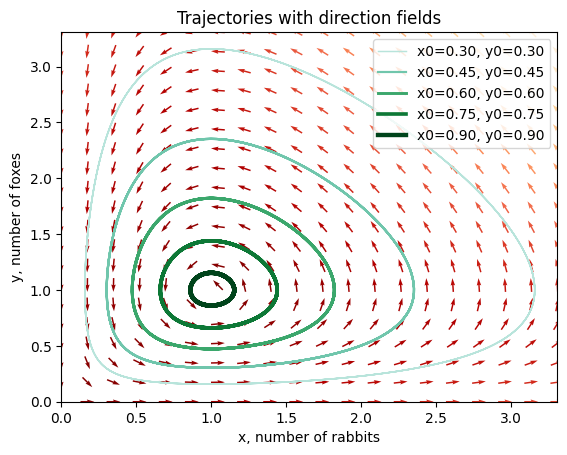

In [ ]:
plt.figure()

# plot trajectories
for v, col in zip(values, vcolors):
    X0 = v * X_f1                               # initial condition
    X = integrate.odeint(lv_derivative, X0, t, args = (alpha, beta, delta, gamma))
    plt.plot( X[:,0], X[:,1], lw=3.5*v, color=col, label='x0=%.2f, y0=%.2f' % (X0[0], X0[1]) )


# define a grid and compute direction at each point
ymax = plt.ylim(ymin=0)[1]                        # get axis limits
xmax = plt.xlim(xmin=0)[1]
nb_points   = 20

x = np.linspace(0, xmax, nb_points)
y = np.linspace(0, ymax, nb_points)

X1 , Y1  = np.meshgrid(x, y)                       # create a grid
DX1, DY1 = lv_derivative([X1, Y1], t, alpha, beta, delta, gamma)                  # compute growth rate on the gridt
M = (np.hypot(DX1, DY1))                           # Norm of the growth rate
M[ M == 0] = 1.                                 # Avoid zero division errors
DX1 /= M                                        # Normalize each arrows
DY1 /= M


plt.title('Trajectories with direction fields')
Q = plt.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=plt.cm.OrRd_r)
plt.xlabel('x, number of rabbits')
plt.ylabel('y, number of foxes')
plt.legend()
plt.xlim(0, xmax)
plt.ylim(0, ymax)
